In [55]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [56]:
# Setting the filename

filename = 'ecommerce-events.ndjson'

In [57]:
#Importing dataset

data = [json.loads(d) for d in open(filename).read().split('\n')]
df = pd.read_json(json.dumps(data))

In [59]:
#viewing the 5 first indexes of the dataset

df.head()

,browserType,browserVersion,category,date,deviceType,eventType,order,orderItems,osType,osVersion,...,referrer,referrerType,searchItems,status,tags,url,utm_campaign,utm_medium,utm_source,visitor
0,Firefox,52.0.0,271|697,2017-06-03 00:07:04,desktop,page,NaN,NaN,Windows,None,...,5af64abc7cb3e5a8be6d22c97331b9afcaad91c5,social,NaN,NaN,NaN,ccde1b63b365cad611f2d1a6fca8a15b0e71d6ef,Campaign_2,Medium_2,Partner_1,89206c00-3f26-11e7-9978-fdec7f5865bc
1,Other,0.0.0,None,2017-06-03 00:07:06,desktop,page,NaN,NaN,Other,None,...,None,direct,NaN,NaN,NaN,5c808dff012fcbe74dc2941a7664e357db367176,None,None,None,b96acfe0-4809-11e7-9b7d-e57b4710e964
2,Chrome Mobile,58.0.3029,None,2017-06-03 00:07:07,mobile,page,NaN,NaN,Android,5.1.1,...,2282902993188bb2b91ce4e931c6f7a4a946f725,None,NaN,NaN,NaN,db2c1fd6668d7432a3e298b40f7b8758cc3e8447,None,None,None,70b09b50-4808-11e7-b949-31f33cf8565d
3,Chrome,50.0.2661,594|541|319,2017-06-03 00:07:24,desktop,page,NaN,NaN,Windows,7,...,e4684c143dfb4f377940afd7a228795b805e554e,None,NaN,NaN,NaN,aefa097f4f0deba18e6db60790704941b559034d,None,None,None,ff14b670-4776-11e7-8c72-5f5d3fe5c610
4,Chrome,55.0.2883,558|648,2017-06-03 00:07:38,desktop,page,NaN,NaN,Windows,None,...,3385b88a74f4bc41a423e47a8b34e188ba8c3ea8,None,NaN,NaN,NaN,131365d819084be07328b1cf624c1214c8e5faeb,None,None,None,fad427f0-d767-11e6-aea4-61a60e8da6e5


In [60]:
# Dropping unused columns

df.drop(['browserType', 'browserVersion', 'osType', 'osVersion'], axis=1, inplace=True)


In [61]:
df.head()

,category,date,deviceType,eventType,order,orderItems,pageType,price,product,query,referrer,referrerType,searchItems,status,tags,url,utm_campaign,utm_medium,utm_source,visitor
0,271|697,2017-06-03 00:07:04,desktop,page,NaN,NaN,product,NaN,NaN,NaN,5af64abc7cb3e5a8be6d22c97331b9afcaad91c5,social,NaN,NaN,NaN,ccde1b63b365cad611f2d1a6fca8a15b0e71d6ef,Campaign_2,Medium_2,Partner_1,89206c00-3f26-11e7-9978-fdec7f5865bc
1,None,2017-06-03 00:07:06,desktop,page,NaN,NaN,home,NaN,NaN,NaN,None,direct,NaN,NaN,NaN,5c808dff012fcbe74dc2941a7664e357db367176,None,None,None,b96acfe0-4809-11e7-9b7d-e57b4710e964
2,None,2017-06-03 00:07:07,mobile,page,NaN,NaN,subcategory,NaN,NaN,NaN,2282902993188bb2b91ce4e931c6f7a4a946f725,None,NaN,NaN,NaN,db2c1fd6668d7432a3e298b40f7b8758cc3e8447,None,None,None,70b09b50-4808-11e7-b949-31f33cf8565d
3,594|541|319,2017-06-03 00:07:24,desktop,page,NaN,NaN,product,NaN,NaN,NaN,e4684c143dfb4f377940afd7a228795b805e554e,None,NaN,NaN,NaN,aefa097f4f0deba18e6db60790704941b559034d,None,None,None,ff14b670-4776-11e7-8c72-5f5d3fe5c610
4,558|648,2017-06-03 00:07:38,desktop,page,NaN,NaN,subcategory,NaN,NaN,NaN,3385b88a74f4bc41a423e47a8b34e188ba8c3ea8,None,NaN,NaN,NaN,131365d819084be07328b1cf624c1214c8e5faeb,None,None,None,fad427f0-d767-11e6-aea4-61a60e8da6e5


### 1 - What was the total revenue?

To get the revenue amount, I need to access the dict into 'orderItems' column, multiply the
items 'price' and 'quantity' and sum the 'subtotal'.

To access the dict, I read row by row of the dict, and append the values 'product', 'price', 
'quantity' to an order list. Creating an 'subtotal' field, that consists in each
item price * item quantity

In [7]:
orders = []
for d in df.to_dict(orient='records'):
    if 'orderItems' in d.keys() and isinstance(d['orderItems'], list):
        for item in d['orderItems']:
            orders.append({
                'product': item['product'],
                'price': item['price'],
                'quantity': item['quantity'],
                'subtotal': item['price'] * item['quantity'],
            })

In [8]:
# Adding orders to dataframe 'df_items'

df_items = pd.DataFrame.from_records(orders)

In [9]:
# Viewing the five first indexes of df_items

df_items.head()

,price,product,quantity,subtotal
0,467.91,6461,2.0,935.82
1,30.27,19168,10.0,302.70
2,30.87,18143,22.0,679.14
3,59.67,19925,2.0,119.34
4,129.90,38,1.0,129.90


In [11]:
# Discovering the total revenue value

revenue = df_items['subtotal'].sum()
print('The total revenue value is: {:.2f}'.format(revenue))

The total revenue value is: 212022.27


In [12]:
# Discovering the amount of sold items (extra)

items_sold = df_items['quantity'].sum()
print('{:.0f} items sold.'.format(items_sold))

4209 items sold.


### 2 - What percentage of visitors used a mobile device?

To solve the second question, I need to discover the values of: total visitors, 
mobile_visitors and apply the formula: (mobile visitors / total visitors) * 100

In [16]:
# Discovering total amount of visitors (any device type)

total_visitors = df['deviceType'].count()
print('{} total visitors.'.format(total_visitors))

692055 total visitors.


In [17]:
# Discovering amount of mobile visitors

mobile_visitors = df['deviceType'].str.count('mobile').sum()
print('{} mobile visitors.'.format(mobile_visitors))

287358 mobile visitors.


In [19]:
# Discovering the percentage of mobile visitors

mobile_visitors_percentage = (mobile_visitors / total_visitors) * 100
print('{:.2f}% of the visitors used mobile devices.'.format(mobile_visitors_percentage))

41.52% of the visitors used mobile devices.


In [20]:
# Discovering amount of 'non-mobile' visitors

non_mobile_visitors = total_visitors - mobile_visitors
print('{} non-mobile visitors'.format(non_mobile_visitors))

# Discovering her percentage

non_mobile_percentage = (non_mobile_visitors / total_visitors) * 100
print('{:.2f}% of the visitors used non-mobile devices.'.format(non_mobile_percentage))

404697 non-mobile visitors
58.48% of the visitors used non-mobile devices.


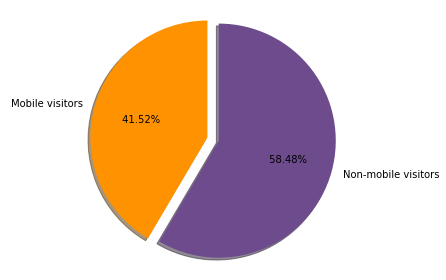

In [22]:
# Visualizing - Pie chart of mobile visitors and non-mobile visitors

labels = ['Mobile visitors', 'Non-mobile visitors']
sizes = [mobile_visitors_percentage, non_mobile_percentage]

# slicing the 'Mobile Visitors'
explode = (0.1, 0)

#adding colors
'''PS: I decided to use the Linx colors to specify the target data using the secondary color 
(orange) for a better view of the data, and the 'non-target' data using the primary color (purple).'''
colors = ['#ff9200', '#6e4b8c']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=' %1.2f%%', shadow=True, startangle=90)

# Equal aspect ration ensures that pie is drawn as a circle
ax1.axis('equal')

plt.tight_layout()
plt.show()

Using the chart above, it is possible to state that only 41.52% of site visitors used mobile devices, while 58,58% of site visitors used non-mobile devices (example: desktop devices).

### 3 - What search query had the highest click-through rate?

Among queries with at least 15 instances

It's considered a click if the target page is a product page and its product id was in the list
of search results.

In [44]:
# Searching event types named as 'search' and appending in a list named 'searches'

searches = []

for d in data:   
    if d['eventType'] == 'search':
        searches.append(d)

In [45]:
# Printing the total results for 'search'

print(f'Searches    : {len(searches)}')

Searches    : 57737


In [47]:
'''Initially i create a dictionary named 'query_results', then I create a loop that reads 
row by row from the 'searches' list, defining some parameters to ignore data, like: 
if the data of 'searchItems' are not included search data, if they do not match lists, and if 
this data does not match the search results, to ignore them. Finally, the valid data is 
incremented in each key and position of the dict.'''

query_results = {}
for d in searches:
    if 'searchItems' not in d.keys():
        continue

    if not isinstance(d['searchItems'], list):
        continue

    if d['query'] not in query_results:
        query_results[d['query']] = 0

    query_results[d['query']] += 1

'''I create a list named 'aggregated_data' and for any data in 'queary_results', I sort
the items and append to 'aggregated_data' list, and for any data in this list, I print the
query result (query name) and their hits'''    

aggregated_data = []

for key, value in sorted(query_results.items(), key=lambda item: (item[1], item[0]))[-10:]:
    aggregated_data.append((key, value))

# Reversing the list to display the items in descending order
aggregated_data = reversed(aggregated_data)

for data in aggregated_data:
    query, hits = data
    print(f'{query}: {hits}')

hiper metros standart: 1693
amendola: 1130
pendente sala: 1036
esmalte barra 1,50m 4,0mm adesivo: 940
tartaruga pisos: 699
branco tinta refrataria iluminação 6l fechadura: 670
bloqueador - 804991: 633
bicama base phd48250r revestimento: 597
rodapé: 589
1149660 piso 1173952: 500


### List Analysis

The result contains the most searched terms, rhere 'hiper metros standart' is the most reached 
term, with 1.693 searches.

Although a good part of the search terms present specifications. the last term attracts a lot of
attention, requiring a more accurate analysis to investigate if this is in fact a specification of
the search or if there is any factor that causes frequent typing errors during the serach by this 
term.

### 4 - When the site is most busy?

Do both what part of the day and day of the week.

To solve this question, I convert the serie 'date' to datetime format, create 2 series, named
'weekday' and 'hour' and order by index, sorting by index (being the days of the week of 0 to 7 
and the hours of 0 to 23). 

Then, I plot the first line graph for the part of the day and the second line graph for the day of the week.

In [48]:
# Converting to datetime format

df['date'] = pd.to_datetime(df['date'])

In [49]:
# Creating a 'weekday' serie and sorting by index (where 0 is de sunday and 6 is saturday)

df['weekday'] = pd.DatetimeIndex(df['date']).weekday

In [50]:
# Creating a 'hour' serie and sorting by index (0 to 23)

df['hour'] = pd.DatetimeIndex(df['date']).hour

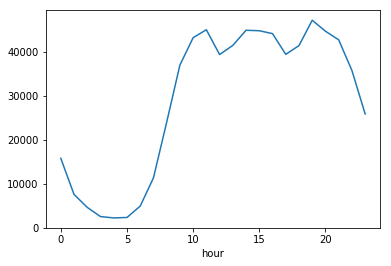

In [51]:
# Visualizing - Ploting number of clicks by hour of the day

df.groupby(df['hour']).size().plot()

### Graph Analysis - Hour of the Day

Initially the site drops from approximately 18 thousand clicks to something close to 2 thousand clicks between midnight and 5am. Between 5am and 11am, the site reaches a peak of approximately 46 thousand clicks, falling for 40 thousand clicks between 11 am and 1 pm (lunch time), then hits increase again to approximately 46 thousand clicks between the 2pm and 4pm, falling to approximately 40 thousand clicks. Its highest access spike is around six o'clock in the afternoon, where the site reaches a click-through rate of approximately 50,000 clicks, which decay at night.

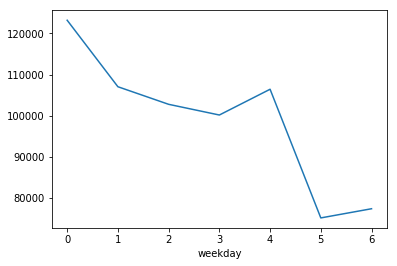

In [52]:
# Visualizing - Ploting number of clicks by day of the week

df.groupby(df['weekday']).size().plot()

### Graph Analysis - Day of the Week

The highest click-through rate on the site occurs on Sunday, with approximately 12.300 clicks, between Sunday and Monday the click-through rate drops to approximately 10.600 clicks. Between Monday and Wednesday, the click-through rate fall to approximately 10 thousand clicks, returning to approximately 11 thousand clicks between Wednesday and Thursday.

The lowest clickthrough rate occurs between Thursday and Friday, where the value drops dramatically to approximately 7,200 clicks, increasing to around 8 thousand clicks between Friday and Saturday.

### 5 - What is the share of revenue among categories brought by Campaign_2?

Use last touch attribution

Initially, I decided to check how many events occur within 'Campaign 2', so that I could have
a sense of the types of events that occur and their respective quantities.

In [69]:
# Creating dicts to count events
campaigns = {}
event_types = {}

# For any 'Campaign_2' data, count the Campaign_2 events
for d in data:
    if d['utm_campaign'] == 'Campaign_2' :
        if d['utm_campaign'] not in campaigns.keys():
            campaigns[d['utm_campaign']] = 0
        if f'{d["utm_campaign"]}_{d["eventType"]}' not in event_types.keys():
            event_types[f'{d["utm_campaign"]}_{d["eventType"]}'] = 0
        campaigns[d['utm_campaign']] += 1
        event_types[f'{d["utm_campaign"]}_{d["eventType"]}'] += 1

# Printing the results, where the event types are contained on campaign 2
print(campaigns, event_types)

{'Campaign_2': 22670} {'Campaign_2_page': 12156, 'Campaign_2_product': 10514}


By checking the events that occurred in 'Campaign 2', I noticed that no transaction types, or purchase confirmation, were only listed page visits that led to some product (not ensuring 
that the visit was converted into a sale).

So I decided to use the same code to see if it was the same in other campaigns, and when checking the occurrences in 'Campaign 1', it also showed visits to product pages, searches and 41 transactions.

In [70]:
# Creating dicts to count events
campaigns = {}
event_types = {}

# For any 'Campaign_1' data, count the Campaign_1 events
for d in data:
    if d['utm_campaign'] == 'Campaign_1' :
        if d['utm_campaign'] not in campaigns.keys():
            campaigns[d['utm_campaign']] = 0
        if f'{d["utm_campaign"]}_{d["eventType"]}' not in event_types.keys():
            event_types[f'{d["utm_campaign"]}_{d["eventType"]}'] = 0
        campaigns[d['utm_campaign']] += 1
        event_types[f'{d["utm_campaign"]}_{d["eventType"]}'] += 1

# Printing the results, where the event types are contained on campaign 1
print(campaigns, event_types)

{'Campaign_1': 24601} {'Campaign_1_page': 17992, 'Campaign_1_product': 3974, 'Campaign_1_search': 2594, 'Campaign_1_transaction': 41}


### Results

Based on the data for the two campaigns presented above, comparing the types of submissions in campaign 1 with those in campaign 2, no evidence was found that  visits pages in campaign 2 were actually converted into sales (because the results don't show any transaction events or purchase confirmation), unlike campaign 1, wich presents transaction events.

### 6 - Estimate the impact of unavailable products¶

Bonus points if you consider cross-elasticity

(don't fret too much. deliver something, no model is ever going to be perfect anyway)


To answer this question, I initially selected all products marked as 'unavailable' and entered
into a list so that I could get their IDs.

Then I looked in 'orderItems' for all items sold that have the same product ID as the 'unavailable'
list, so that I could estimate the financial impact.

Lastly, I felt free to select sales over a period of a week (choosing between 2017-06-01 and 
2017-06-07), so that I could have a sense of the approximate financial impact per week and per day.

In [62]:
# Initializing lists and products dict

products = {}
products_unavailable = []
transactions = []
total = 0

# Checking if event type is equal transaction and appending to 'transaction' list
for d in data:
    page_type = d['pageType']
    event_type = d['eventType']
    if event_type == 'transaction':
        transactions.append(d)
        continue

    #Counting if the event_type is equal product
    if event_type == 'product':
        total += 1
        # Verifying if the product already exists on the "database"
        if d['product'] not in products.keys():
            if d['status'] == 'UNAVAILABLE':
                products[d['product']] = d['price']
                products_unavailable.append(d['product'])

In [63]:
#Initializing total value and unavailable transactions list

total_value = 0
unavailable_transactions = []

#For any transaction on 'transactions', intialize the total value and create transaction products list
for t in transactions:
    subtotal = 0
    t_products = []
    
    '''In section below, for any product in orderItems list, if the product is in unavailable products 
    list, the product price and total value of the product (being the subtotal * quantity) are incresaed
    in the variables 'total_value' and 'subtotal', and the product is added to 't_products' list '''
    
    for product in t['orderItems']:
        if product['product'] in products_unavailable:
            total_value += product['price']
            subtotal += product['price'] * product['quantity']
            t_products.append(product)
    
    # If the 't_products' list had at least one item, add items to 'unavailable_transactions' list
    if t_products:
        unavailable_transactions.append({
            'date': t['date'],
            'subtotal': subtotal
        })

# Convert the date of 'unavailable_transactions' list from string to datetime
df = pd.read_json(json.dumps(unavailable_transactions, indent=4))
df['date'] = pd.to_datetime(df['date'])

In [67]:
# Select the datetime between 2017-06-01 and 2017-06-07
mask = (df['date'] > '2017-06-01') & (df['date'] <= '2017-06-07')

# Sum the total value of the week (using the week datetime) to know the financial impact in one week
total_week = df.loc[mask]['subtotal'].sum()

# Divides the week value by 7 to know the financial impact per day
daily_average = total_week / 7

### Results Analysis

According to the temporality chosen, as a result, products marked as 'unavailable' have a financial
impact of approximately: 

In [68]:
# Print the results
print(f'Per week: R$ {total_week:.2f} | Daily average: R$ {daily_average:.2f}')

Per week: R$ 10846.88 | Daily average: R$ 1549.55
